# Feature Selection

Notebook de resumo sobre os métodos de seleção de features

### Tipos de Algoritmos e Métodos

Os métodos de seleção de features podem ser divididos basicamente em:

![](https://miro.medium.com/max/1400/1*k8272idmlQ5X6JEuhwXGqA.png)

- **Filter Methods**: Métodos de seleção de subconjuntos de atributos com base em seu relacionameno com a variável alvo.  Ele pode ser dividivo em:
    - Métodos estatísticos: utiliza medidas estatísticas para atribuir um score para cada feature, normalmente se usam testes univariados que consideram a independência da feature com a variável alvo. Exemplo: chi squared, scores com coeficiente de correlação.<br>
    - Feature Importance: As features são classificadas pelo score para serem mantidas ou removidas do modelo.  Métodos ensembles como o algoritmo Random Forest, podem ser usados para estimar a importância de cada atributo. Ele retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.
<br>
<br>

- **Wrapper Methods** : Métodos de seleção que selecionam um conjunto de features, onde diferentes combinações são preparadas, avaliadas e comparadas. Um modelo preditivo é usado para avaliar a combinação de features a atribuir um score baseado em uma acurácia de modelo. Exemplo: algoritmo RFE <br>
<br> 

- **Embedded Methods** : Métodos Embedded aprendem quais feature melhor contribuiem para a acurácia do modelo no momento de construção do modelo. Esse método combina os métodos Filter e o Wrapper, usando o que há de melhor em cada um. É implementado por algoritmos que têm seus próprios métodos de seleção de recursos internos. Dentre os métodos incorporados, os métodos mais usados são os de regularização, que penalizam um recurso, dado um limite de coeficiente.Exemplo: métodos de penalização, algoritmos Lasso, Elastic NEt e Ridge Regression.




### Carregando dados para demonstração

Esses dados são somente para demonstração. 
Valores podem estar errados em função do métodos aplicado.

In [44]:
import pandas as pd

In [45]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', names=colnames)
df.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [46]:
X = df.drop(['class'], axis=1)
y = df['class']

## Filter Methods

Os métodos de filtro são geralmente usados ​​como uma etapa de pré-processamento de dados. A seleção de recursos é independente de qualquer algoritmo de aprendizado de máquina. As características classificam com base em pontuações estatísticas que tendem a determinar a correlação das características com a variável de resultado. 

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)

### Univariate Selection

Podemos utilizar os métodos estatísticos tanto para classificação como para regressão, sendo os principais:

- **f_classif**:  é adequado quando os dados são numéricos e a variável alvo é categórica.
- **mutual_info_classif**: indicado para quando *não* há uma dependência linear entre as features e a variável alvo.
- **f_regression**: aplicado para problemas de regressão.



Para utilizar esses classificadores podemos utilizar os métodos : SelectKBest e SelectPercentile

#### SelectKBest

In [4]:
# testendo o f_classif
from sklearn.feature_selection import SelectKBest # SelectKBest nos permite selecionar apenas os k melhores atributos
from sklearn.feature_selection import f_classif

In [5]:
# k=4, pedido para selecionar os 4 melhores atributos
# score_func -> passo aqui qual o método que quero aplicar, mas posso colocar somente o nome do metodo

model1 = SelectKBest(score_func=f_classif, k=4)

In [6]:
# treinando o modelo com o f_classif
model1.fit(X,y)

SelectKBest(k=4)

In [7]:
# aplicação do modelo nos dados de treino, para que seja feita a seleção dos melhores atributos
features = model1.transform(X)

In [8]:
# número das colunas que foram selecionadas
model1.get_support(indices=True)

array([0, 1, 5, 7], dtype=int64)

In [20]:
# nome das colunas que foram selecionadas
model1.get_feature_names_out(input_features=None)

array(['preg', 'plas', 'mass', 'age'], dtype=object)

A parte boa do SelectKBest é que ele funciona para problemas de regressão e classificação. 
A parte ruim é que escolher o número K ideal é difícil. Muitas das vezes, o valor atribuído é bem empírico, mas você pode tentar contornar o SelectPercentile, que irá selecionar X% das melhores features.

#### SelectPercentile

In [13]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# chi2:  Mede a dependência entre variáveis estocásticas, o uso dessa função “elimina” 
# os recursos com maior probabilidade de serem independentes da classe e, portanto,
# irrelevantes para a classificação.

In [19]:
model2 = SelectPercentile(chi2, percentile=50) # 50% dos atributos mais relevantes
model2.fit(X, y)
features = model2.transform(X)
print("número das colunas", model2.get_support(indices=True))
print("nome das colunas", model2.get_feature_names_out(input_features=None))

número das colunas [1 4 5 7]
nome das colunas ['plas' 'test' 'mass' 'age']


Segundo o SKLearn 

- f_classif<br>
ANOVA F-value between label/feature for classification tasks.
<br> <br>

- mutual_info_classif <br>
Mutual information for a discrete target.
<br><br>

- chi2 <br>
Chi-squared stats of non-negative features for classification tasks.
<br><br>

- f_regression <br>
F-value between label/feature for regression tasks | Coeficiente de Correlação de Pearson
<br><br>

- mutual_info_regression <br>
Mutual information for a continuous target.
<br><br>


- SelectFpr <br>
Select features based on a false positive rate test.
<br><br>

- SelectFdr <br>
Select features based on an estimated false discovery rate.
<br><br>

- SelectFwe <br>
Select features based on family-wise error rate.
<br><br>

- GenericUnivariateSelect <br>
Univariate feature selector with configurable mode.

<br>


Segundo o SciPy
- tau de Kendall: kendalltau()
- Correlação de classificação de Spearman: spearmanr()


========================================================================================================

![](https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/12/11-Univariate-Feature-Selection-Methods.png?resize=768%2C634&ssl=1)


Pela imagem da para ter uma ideia melhor sobre quando usar qual método:

- Variável de entrada numérica e variável de saída numérica: Este é um problema de **regressão**.
    - Correlação de Pearson para uma relação linear.
    - Correlação de Spearman para um relacionamento monotônico.
<br><br>

- Variável de Entrada Numérica e Variável de Saída Categórica: Este é um problema de **classificação**.
    - ANOVA para uma relação linear.
    - Kendall é para um relacionamento não linear.
<br><br>

- Variável de entrada categórica e variável de saída numérica: Este é um problema de **regressão**. enfrentamos esse tipo de problema muito raramente.
    - ANOVA para uma relação linear.
    - Kendall é para um relacionamento não linear.
<br><br>

- Variável de Entrada Categórica e Variável de Saída Categórica: Este é um problema de **classificação**.
    - Teste Qui-Quadrado.
    - Informação mútua.

<br><br>

Outra forma cmpreender os métodos é:

![image](https://user-images.githubusercontent.com/71708626/156542691-7f3712fd-7d4f-4215-b3f8-b2bd9e94039b.png)


### Feature Importance

Quando se trabalha com ensembles, como RandomForest e XGBoost, você pode contar com um aliado para identificar as features mais importantes de seu modelo: o atributo `feature_importance_`.
O `feature_importance_` irá retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.0805051  0.25383268 0.09511771 0.06774806 0.06528796 0.18677426
 0.13028377 0.12045046]


In [ ]:
colnames

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances

,importance
plas,0.253833
mass,0.186774
pedi,0.130284
age,0.120450
pres,0.095118
preg,0.080505
skin,0.067748
test,0.065288


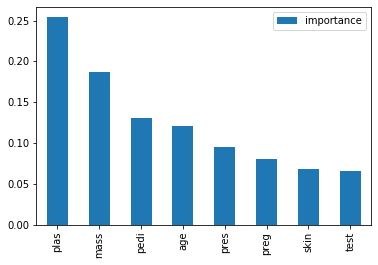

In [ ]:
feature_importances.plot(kind='bar')

-------------------

## Wrapper Methods

O método wrapper precisa de um algoritmo de aprendizado de máquina e usa seu desempenho como critério de avaliação. É uma estratégia conhecida como __algoritmo guloso__, que é tentar atingir a melhor escolha tomando diversas pequenas boas escolhas

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)

As principais forma de se aplicar os métodos Wrapper são: 
 - RFE
 - SelectFromModel
 - SequentialFeatureSelector

#### RFE - Recursive Feature Elimination

- Com Recursive Feature Elimination é possivel construir modelos a partir da remoções de features.

- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para uma melhor performance.

- Em grandes bases de dados o tempo de processamento pode ser um problema.


- Este método só funciona se o modelo tiver `coef_` ou `features_importances_`.

In [26]:
# Para a utilização do RFE é necessário importar o modelo e a função de seleção

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [27]:
from sklearn.feature_selection import RFE

In [30]:
rfe = RFE(model, n_features_to_select=4, step=1)

In [31]:
fit = rfe.fit(X, y)

In [35]:
print("número das colunas", rfe.get_support(indices=True))
print("nome das colunas", rfe.get_feature_names_out(input_features=None))  

número das colunas [0 1 5 6]
nome das colunas ['preg' 'plas' 'mass' 'pedi']


#### SelectFromModel

Assim como o RFE, o SelectFromModel do Scikit-Learn é baseado em uma estimativa do modelo, para selecionar os recursos. As diferenças são que a seleção de recurso SelectFromModel é baseada no atributo de importância threshold (geralmente é `coef_` ou `feature_importances_` mas pode ser qualquer callable). Por padrão, o limite é a média.

In [49]:
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['pedi'], dtype='object')

In [50]:
print("número das colunas", sfm.get_support(indices=True))
print("nome das colunas", sfm.get_feature_names_out(input_features=None))

número das colunas [6]
nome das colunas ['pedi']


#### SequentialFeatureSelector

__Estratégia stepwise__ ou __regressão stepwise__ (visto que é mais comum de ver o uso dela com regressão linear na literatura de estatística), tem como objetivo comparar diferentes subconjuntos das features, escolhendo o melhor deles. 

A ideia é a seguinte:
- Imagina que comecemos usando todas as features. Temos então o quão bem o modelo performa.
- Agora, vamos comparar os modelos obtidos retirando 1 feature, e deixando todo o resto.
- O que for melhor, a gente coloca na lista final.
- Repetimos o processo, retirando 2 features, e assim por diante (3 features, 4 features, etc...).
- Escolhemos o melhor modelo dentre todos que estão na nossa lista final.

O nome do processo acima é __backward stepwise selection__ (em uma tradução livre, "seleção passo a passo de trás pra frente"). É possível fazer o processo inverso também, __forward stepwise selection__ ("seleção passo a passo seguindo pra frente"), onde começamos com o mínimo de features, e vamos aumentando o número.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold

model = RandomForestClassifier(max_depth=5)
cv_splitter = KFold(n_splits=5, shuffle=True)

feature_selector = SequentialFeatureSelector(model,
                                             n_features_to_select=4, 
                                             direction='backward', 
                                             scoring='accuracy',
                                             cv=cv_splitter)

feature_selector.fit(X, y)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                          direction='backward',
                          estimator=RandomForestClassifier(max_depth=5),
                          n_features_to_select=4, scoring='accuracy')

In [48]:
print("número das colunas", feature_selector.get_support(indices=True))
print("nome das colunas", feature_selector.get_feature_names_out(input_features=None))

número das colunas [1 2 5 7]
nome das colunas ['plas' 'pres' 'mass' 'age']


## Embedded methods

Os métodos embutidos são iterativos no sentido de que cuidam de cada iteração do processo de treinamento do modelo e extraem cuidadosamente os recursos que mais contribuem para o treinamento de uma iteração específica. Os métodos de regularização são os métodos embutidos mais comumente usados que penalizam um recurso dado um limiar de coeficiente.

É por isso que os métodos de regularização também são chamados de métodos de penalização que introduzem restrições adicionais na otimização de um algoritmo preditivo (como um algoritmo de regressão) que enviesam o modelo para menor complexidade (menos coeficientes).

Exemplos de algoritmos de regularização são o LASSO, Elastic Net, Ridge Regression, etc.

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/7-Intrinsic-Feature-Selection-Method.png?resize=768%2C382&ssl=1)

- Regularização
Pode-se entender regularização como a inserção de bias em um modelo. Ou em outras palavras, essa técnica desencoraja o ajuste excessivo dos dados, afim de diminuir a sua variância.
Dentro da regressão linear, Ridge e Lasso são formas de regularizarmos a nossa função através de penalidades. De forma simples, dentro de uma equação estatística dos dados, nós alteramos os fatores de forma a priorizar ou não certas parcelas da equação e, assim, evitamos ‘overfitting’ e melhoramos a qualidade de predição.
<br><br>
- Seleção de Features
Na prática, o hiperparâmetro $\alpha$, que controla a força da penalização, assume uma grande importância. Quando o $\alpha$ é suficientemente grande, os coeficientes são forçados a ser exatamente iguais a zero, desta forma a dimensionalidade pode ser reduzida. Quanto maior for o parâmetro $\alpha$, mais coeficientes serão encolhidos a zero. Por outro lado, se $\alpha$ = 0, temos uma regressão linear comum.

### LASSO - Least Absolute Shrinkage and Selection Operator (L1)

É um método poderoso que executa principalmente duas tarefas: **Regularização** e **Seleção de Features**. 

Equação da regressão linear:
![](https://miro.medium.com/max/654/1*UFsN2JHfP5t_E1a9icTbwQ.png)

Uma forma de diminuir o erro de overfit é aumentar o bias.
Para isso, regularizamos os coeficientes w, ou seja, restringimos o seu tamanho. 
Isso é feito adicionando um termo na função de custo, de forma que minimizar a função de custo automaticamente minimize também os coeficientes.


Equação com a penalização LASSO:
![](https://miro.medium.com/max/1070/1*dynW6DLJxX2iaMrnfgxk_A.png)


Além de diminuir a variância do modelo, essa regularização tem uma outra importante aplicação em machine learning. 
Quando há múltiplas features altamente correlacionadas (ou seja, features que se comportam da mesma maneira) a regularização Lasso seleciona apenas uma dessas features e zera os coeficientes das outras, de forma a minimizar a penalização L1.
Desse modo, dizemos que esse modelo realiza feature selection automaticamente, gerando vários coeficientes com peso zero, ou seja, que são ignorados pelo modelo. Isso facilita a interpretação do modelo, o que é uma enorme vantagem.


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error")

search.fit(X,y)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_

importance = np.abs(coefficients)
importance

features = X.columns
np.array(features)[importance > 0]
np.array(features)[importance == 0]

array(['preg', 'pres', 'skin', 'test', 'pedi', 'age'], dtype=object)

### Ridge (L2)

Equação da regressão linear:
![](https://miro.medium.com/max/654/1*UFsN2JHfP5t_E1a9icTbwQ.png)

Equação com penalização Ridge: 
![](https://miro.medium.com/max/1060/1*_2_bFm9NkDrOmfOYs5lNFA.png)



Nesse caso, a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos. 

Qual será o efeito dessa regularização nos coeficientes de duas features altamente correlacionadas?
Poderíamos ter duas features com coeficientes parecidos, ou uma com coeficiente alto, e outra com coeficiente zero. Como a penalização L2 é desproporcionalmente maior para coeficientes maiores, a regularização Ridge faz com que features correlacionadas tenham coeficientes parecidos.
No entanto, essa regularização não diminui a susceptibilidade do modelo a outliers, de forma que é recomendável limpar o dataset e remover features desnecessárias antes de realizar esse tipo de regressão.


SKLEARN:
- RidgeClassifier<br>


- RidgeCV<br>
Ridge regression with built-in cross validation.

- KernelRidge<br>
Kernel ridge regression combines ridge regression with the kernel trick.

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std, absolute


# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = KFold(n_splits=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.337 (0.022)


In [58]:
## Tuning Elastic Net Hyperparameters
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.337
Config: {'alpha': 0.0}


### Elastic Net — L1+L2

Se trata exatamente de combinar os termos de regularização de L1 e L2. Assim, obtemos o melhor dos dois mundos, porém temos que enfrentar o problema de determinar dois hiperparâmetros para obter soluções ótimas.

Equação da regressão linear:
![](https://miro.medium.com/max/654/1*UFsN2JHfP5t_E1a9icTbwQ.png)

Equação com a penalização Elastic Net:
![](https://miro.medium.com/max/1386/1*elv_EM7V-1QvnVkD0Mmk8Q.png)


SKLEARN:
- ElasticNetCV<br>
Elastic net model with best model selection by cross-validation.

- SGDRegressor<br>
Implements elastic net regression with incremental training.

- SGDClassifier<br>
Implements logistic regression with elastic net penalty (SGDClassifier(loss="log", penalty="elasticnet")).

In [60]:
from numpy import mean, std, absolute
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.362 (0.018)


**Comparação entre LASSO, Ridge e Elastic Net**

![](https://miro.medium.com/max/1400/1*PdC1TQDuQUepWpVLgswTmQ.png)

No gráfico da esquerda, ainda que os pontos sejam aleatórios, observa-se uma tendência fraca nos dados (ruído). Essa tendência é capturada pela regressão linear e Ridge, mas não pela regressão Lasso ou Elastic Net. Para entender esse comportamento, observe que, nesse caso, os coeficientes da regressão linear são pequenos, de forma que a penalização Ridge, que conta com os coeficientes ao quadrado, é muito pequena. Já a penalização Lasso é alta o suficiente para levar os coeficientes a zero.


No gráfico do meio, a tendência de crescimento é maior, tal que a regressão Lasso obtém um coeficiente não nulo, ainda que pequeno. Os coeficientes da regressão Ridge são maiores e mais próximos do correto.


No gráfico da direta, a situação se inverte. As regressões Lasso e Elastic Net chegam muito próximo dos dados, mas a Ridge fica mais longe dos dados, porque a penalidade L2 é mais influenciada por coeficientes grandes.


Baseado nessas observações, podemos observar que a regressão com regularização Lasso tende a ignorar relações fracas, enquanto a regressão com regularização Ridge considera também relações fracas, mas não lida tão bem com relações fortes. A regressão Elastic Net é um intermediário entre Ridge e Lasso.

### Automatizando a Seleção de Features

- Se estiver usando scikit-learn podemos usar Pipelines para automatização.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])

In [35]:
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [36]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

**Refs**

- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb
- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
- https://medium.com/analytics-vidhya/feature-selection-in-machine-learning-ec1f5d053007
- https://dataaspirant.com/feature-selection-methods-machine-learning/
- https://medium.com/analytics-vidhya/feature-selection-in-machine-learning-ec1f5d053007
- https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172
- https://medium.com/data-hackers/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-faf74e357913
- https://minerandodados.com.br/aprenda-como-selecionar-features-para-seu-modelo-de-machine-learning/
- https://medium.com/@airtonneto/sele%C3%A7%C3%A3o-de-atributos-para-data-science-e-machine-learning-2842c63fc59f
- https://www.datacamp.com/community/tutorials/feature-selection-python